In [82]:
## Import the necessary libraries:-


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (confusion_matrix, accuracy_score, recall_score,classification_report,
                             precision_score,roc_auc_score,f1_score,mean_absolute_error,roc_curve)

import pickle
import logging 
import traceback

In [53]:
## Load the dataset using pandas:

df_full = pd.read_csv(r"F:\Ineuron DS\Assignment\Click\train.gz")

In [61]:
df = df_full.sample(30000,random_state=42)

In [62]:
## Checking top 5 rows

df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
12769793,1.219830e+19,0,14102319,1005,0,85f751fd,c4e18dd6,50e219e0,98fed791,d9b5648e,0f2161f8,a99f214a,fc723bb6,72a00661,1,0,20277,320,50,2281,3,47,100182,42
15396835,6.333857e+18,0,14102413,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,fc61627b,3bd9e8e7,1,0,15705,320,50,1722,0,35,-1,79
27744148,1.297881e+19,0,14102805,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,c646d2c8,1f0bc64f,1,0,20108,320,50,2299,2,1327,100084,52
34369722,6.644525e+18,0,14102911,1005,0,85f751fd,c4e18dd6,50e219e0,1a32e234,2347f47a,0f2161f8,18991006,440979d3,421872ab,1,0,20170,300,50,2312,0,167,100079,16
31917930,4.572864e+18,0,14102820,1005,0,85f751fd,c4e18dd6,50e219e0,3e2bf98d,2347f47a,0f2161f8,afeffc18,be9a7b07,8e39e528,1,2,22955,320,50,2655,2,38,-1,23


In [63]:
# info 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 12769793 to 1673959
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                30000 non-null  float64
 1   click             30000 non-null  int64  
 2   hour              30000 non-null  int64  
 3   C1                30000 non-null  int64  
 4   banner_pos        30000 non-null  int64  
 5   site_id           30000 non-null  object 
 6   site_domain       30000 non-null  object 
 7   site_category     30000 non-null  object 
 8   app_id            30000 non-null  object 
 9   app_domain        30000 non-null  object 
 10  app_category      30000 non-null  object 
 11  device_id         30000 non-null  object 
 12  device_ip         30000 non-null  object 
 13  device_model      30000 non-null  object 
 14  device_type       30000 non-null  int64  
 15  device_conn_type  30000 non-null  int64  
 16  C14               30000 non-nul

In [64]:
# description of data

df.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,3.000000e+04,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,9.142936e+18,0.170900,1.410256e+07,1004.972000,0.288933,1.016433,0.332133,18866.907100,318.801600,60.010000,2116.004600,1.442300,228.222900,53309.235467,83.193100
std,5.329527e+18,0.376428,2.965374e+02,1.092332,0.495169,0.526598,0.855791,4924.263263,20.545593,46.514935,604.700234,1.329811,350.881834,49951.549058,70.229736
min,1.750794e+14,0.000000,1.410210e+07,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,13.000000
25%,4.520098e+18,0.000000,1.410230e+07,1005.000000,0.000000,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000
50%,9.057015e+18,0.000000,1.410260e+07,1005.000000,0.000000,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100048.000000,61.000000
75%,1.374146e+19,0.000000,1.410281e+07,1005.000000,1.000000,1.000000,0.000000,21912.250000,320.000000,50.000000,2526.000000,3.000000,175.000000,100094.000000,101.000000
max,1.844654e+19,1.000000,1.410302e+07,1012.000000,7.000000,5.000000,5.000000,24043.000000,1024.000000,768.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000


In [65]:
# Checking for missing values 

df.isnull().sum()

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

In [66]:
# Droping id column

df.drop('id',axis = 1,inplace = True)

In [67]:
# Resetting the index

df.reset_index(inplace = True)

In [68]:
df.drop('index',axis = 1,inplace = True)

In [69]:
df.head(2)

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,14102319,1005,0,85f751fd,c4e18dd6,50e219e0,98fed791,d9b5648e,0f2161f8,a99f214a,fc723bb6,72a00661,1,0,20277,320,50,2281,3,47,100182,42
1,0,14102413,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,fc61627b,3bd9e8e7,1,0,15705,320,50,1722,0,35,-1,79


In [70]:
# numerical and categorical features

numerical_features =[i  for i in df.columns if df[i].dtype != 'O' and i != 'click']

categorical_features = [i  for i in df.columns if df[i].dtype == 'O'  ]

In [71]:
# Formating hour column 

df['year'] = 0
df['month'] = 0
df['day'] = 0

for i in range(len(df['hour'])):
    hour = str(df['hour'].loc[i])
    df['year'].loc[i] = int(hour[:2])
    df['month'].loc[i] = int(hour[2:4])
    df['day'].loc[i] = int(hour[4:6])
    df['hour'].loc[i] = int(hour[6:])

In [79]:
# No.of class in each features

for i in df:
    cat = len(df[i].unique())
    print(f"{i} has total of {cat} categories")

click has total of 2 categories
hour has total of 24 categories
C1 has total of 7 categories
banner_pos has total of 6 categories
site_id has total of 942 categories
site_domain has total of 791 categories
site_category has total of 17 categories
app_id has total of 780 categories
app_domain has total of 64 categories
app_category has total of 20 categories
device_id has total of 5083 categories
device_ip has total of 25749 categories
device_model has total of 2121 categories
device_type has total of 4 categories
device_conn_type has total of 4 categories
C14 has total of 1359 categories
C15 has total of 7 categories
C16 has total of 8 categories
C17 has total of 376 categories
C18 has total of 4 categories
C19 has total of 62 categories
C20 has total of 146 categories
C21 has total of 59 categories
year has total of 1 categories
month has total of 1 categories
day has total of 10 categories


C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


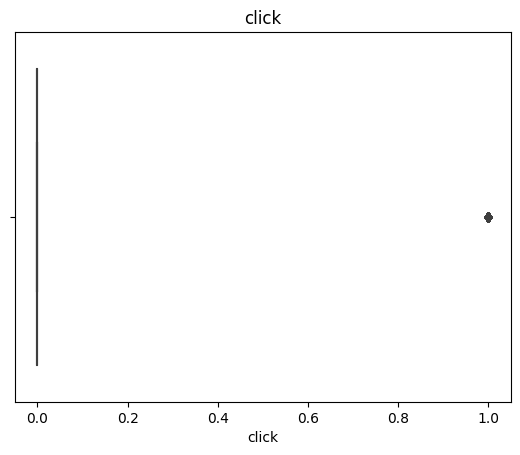

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


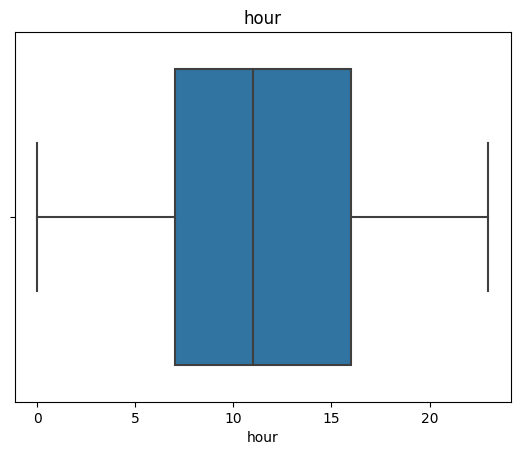

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


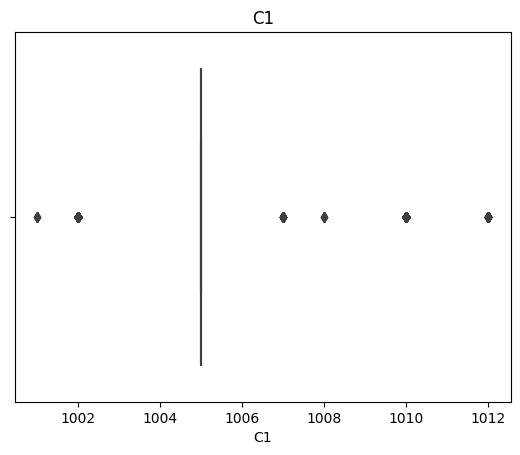

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


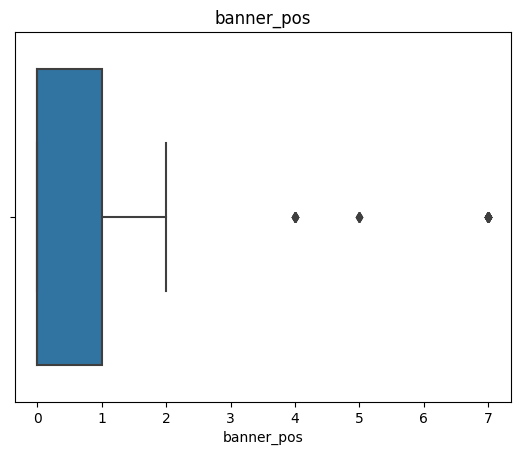

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: Horizontal orientation requires numeric `x` variable.

In [80]:
# Outliers

for i in df:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [61]:
# Outliers count 

for i in numerical_features:
    per_75 = df[i].quantile(0.75)
    per_25 = df[i].quantile(0.25)
    iqr = per_75 - per_25
    
    upper_limit = per_75 + 1.5 *(iqr)
    lower_limit = per_25 + 1.5*(iqr)
    
    outlier = len(df) - len(df[(df[i]>upper_limit) | (df[i] < lower_limit)]) 
    
    print(f"{i} has {round((outlier/len(df))*100,3)}% of outliers")

click has 82.91% of outliers
hour has 6.803% of outliers
C1 has 91.957% of outliers
banner_pos has 0.033% of outliers
device_type has 92.36% of outliers
device_conn_type has 86.25% of outliers
C14 has 0.0% of outliers
C15 has 93.213% of outliers
C16 has 94.323% of outliers
C17 has 0.0% of outliers
C18 has 0.0% of outliers
C19 has 4.927% of outliers
C20 has 0.0% of outliers
C21 has 8.513% of outliers
year has 100.0% of outliers
month has 100.0% of outliers
day has 0.0% of outliers


In [72]:
# Frequency encoding

for i in categorical_features:
    fq = df.groupby(i).size()/len(df)
    df.loc[:, "{}_freq_encode".format(i)] = df[i].map(fq)
    df.drop(i,axis = 1,inplace = True)
    

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   click                      30000 non-null  int64  
 1   hour                       30000 non-null  int64  
 2   C1                         30000 non-null  int64  
 3   banner_pos                 30000 non-null  int64  
 4   device_type                30000 non-null  int64  
 5   device_conn_type           30000 non-null  int64  
 6   C14                        30000 non-null  int64  
 7   C15                        30000 non-null  int64  
 8   C16                        30000 non-null  int64  
 9   C17                        30000 non-null  int64  
 10  C18                        30000 non-null  int64  
 11  C19                        30000 non-null  int64  
 12  C20                        30000 non-null  int64  
 13  C21                        30000 non-null  int

####  Data Visualization

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


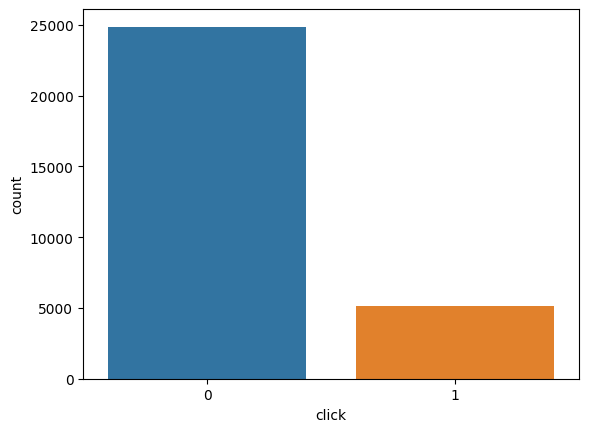

In [109]:
sns.countplot('click',data = df)
plt.show()

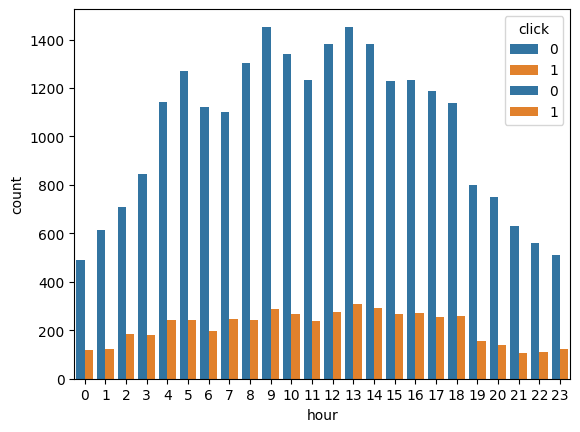

In [111]:
sns.countplot(x = 'hour',data = df, hue = 'click')
plt.show()

C:\Users\HP-LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


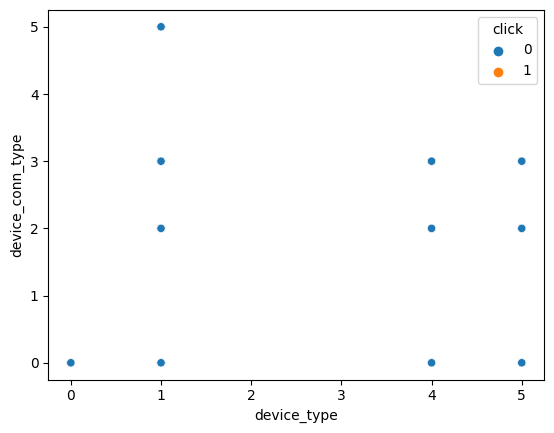

In [119]:
sns.scatterplot('device_type','device_conn_type',data = df,hue = 'click')
plt.show()

Observation:

* The frequency of clicking ad by user doesn't vary much throughout the day


In [11]:
# Droping month and year -- 

df.drop(['year','month'],axis = 1,inplace = True)

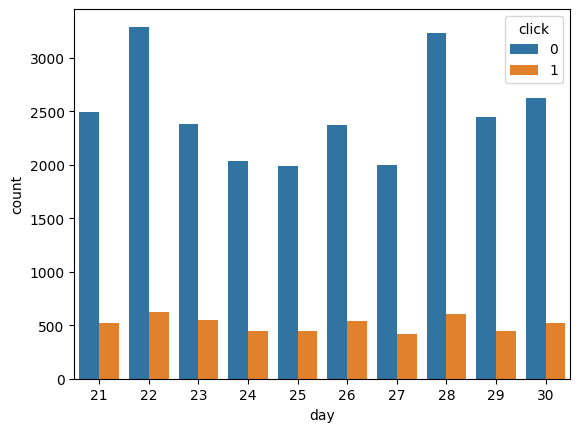

In [136]:
sns.countplot(x = 'day',data = df, hue = 'click')
plt.show()

In [13]:
df.head(2)

,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,year,month,day,site_id_freq_encode,site_domain_freq_encode,site_category_freq_encode,app_id_freq_encode,app_domain_freq_encode,app_category_freq_encode,device_id_freq_encode,device_ip_freq_encode,device_model_freq_encode
0,0,19,1005,0,1,0,20277,320,50,2281,3,47,100182,42,14,10,23,0.361133,0.3746,0.4090,0.005567,0.018467,0.237633,0.827133,0.000033,0.001633
1,0,13,1005,0,1,0,15705,320,50,1722,0,35,-1,79,14,10,24,0.159800,0.1598,0.1803,0.638867,0.673100,0.646400,0.827133,0.000067,0.008500


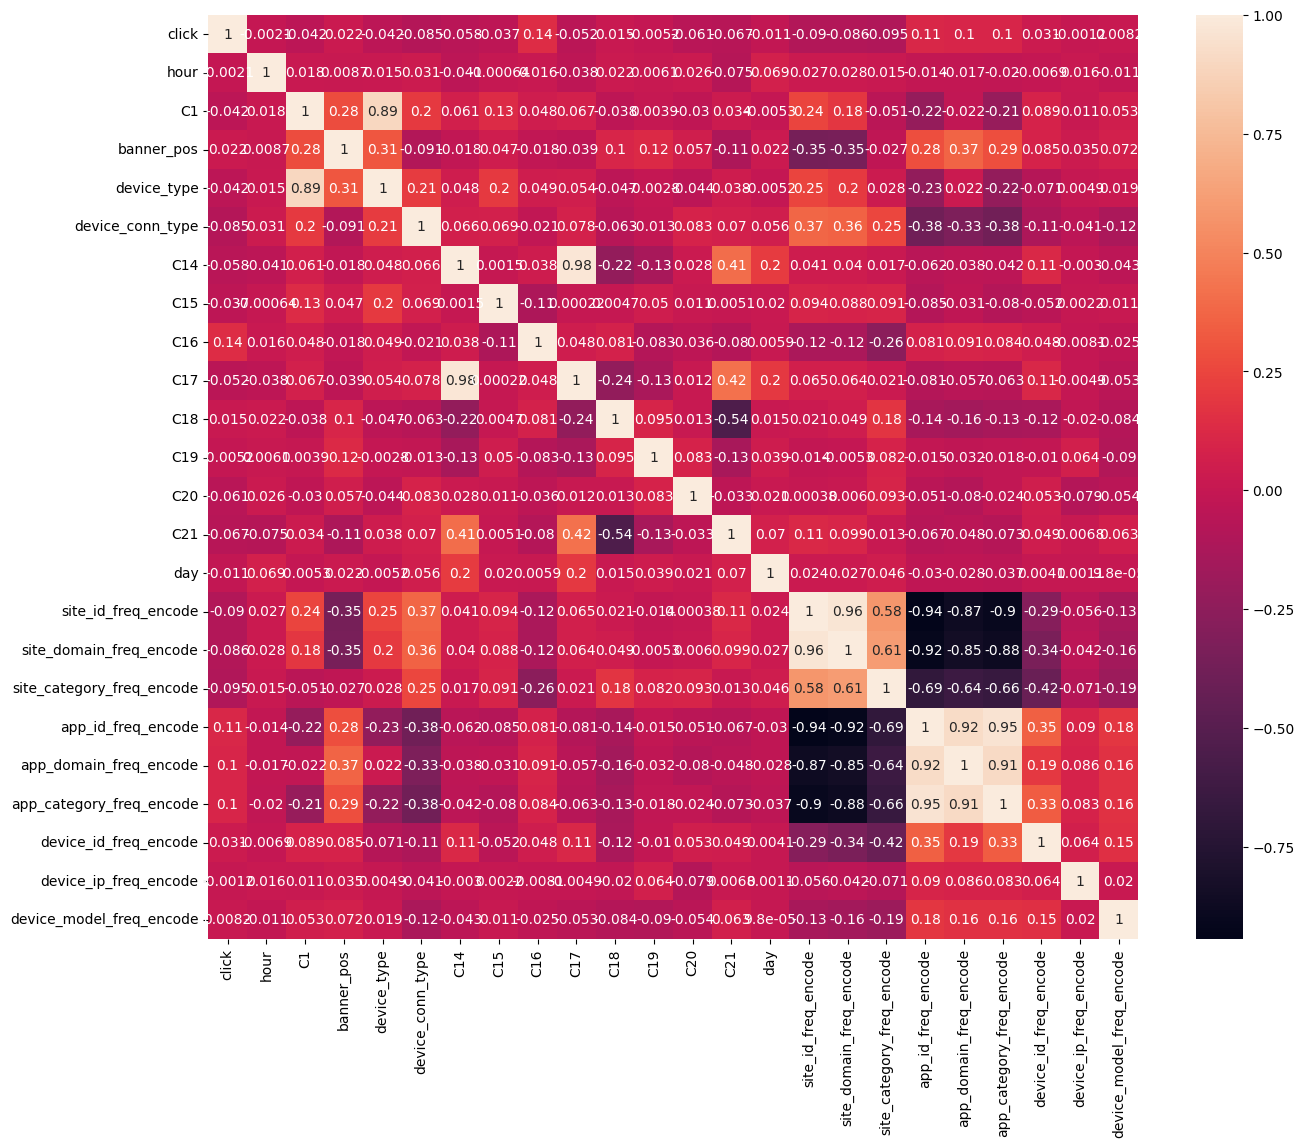

In [17]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [12]:
# Droping highly correlated features

# corr_feature = ['C14','site_id_freq_encode','app_domain_freq_encode','app_category_freq_encode']

# df.drop(corr_feature,axis = 1,inplace = True)

In [13]:
df.shape

(30000, 20)

In [135]:
# Dependent and Independent Features

X = df.drop(['click'],axis = 1)
y = df['click']

# Train Test Split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [94]:
# Model building


models = { "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Gradient Boosting": GradientBoostingClassifier(),
          "AdaBoost classifier": AdaBoostClassifier(),
          "Xg boost": XGBClassifier
          () 
            }


params={"Decision Tree": 
        {
        # "criterion":['squared_error','friedman_mse','absolute_error'],
        'max_depth':[2,4,6],
        'min_samples_split':[2,4,6],
        'random_state':[42]
        },
        
        "Random Forest":
        {
        'n_estimators': [100,112,124,143,156],
        'min_samples_split':[2,4,6],
        'random_state':[42],
        'max_depth':[4,5,2]
        },
        
        "Gradient Boosting":
        {
        'learning_rate':[0.04,0.05,0.09,0.004],
        'n_estimators':[143,150,164,175],
        'min_samples_split':[2,4,6],
        'max_depth':[4,5,2],
        'random_state':[42]
        },
        
        "AdaBoost classifier":
        {
        "n_estimators":[143,150,164,175],
        'learning_rate':[0.04,0.05,0.09,0.004],
        'random_state':[42]
        },
        "Xg boost":
        {
        'learning_rate':[0.04,0.001,0.03,0.01],
         'n_estimators':[175,186,191,201],
         'max_depth' : [4,6,8,10],
         'random_state':[42]
        
       }
       }

In [152]:
# Model building

logging.basicConfig(filename="log_file.log",level=logging.INFO,format='%(asctime)s %(levelname)s %(message)s')


class model_training:
    
    def __init__(self,X_train,X_test,y_train,y_test,models,param_grid):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.models = models
        self.param_grid = param_grid

    def eval_model(self):
    

        report = {}
        classificationreport = {}
        final_model = {}
        confusionmatrix = {}


        for i in models:
            
            mo_dels = models[i]

            model = GridSearchCV(mo_dels,cv = 2, param_grid = params[i])

            model.fit(X_train,y_train)

            y_train_pred = model.predict(X_train)

            y_test_pred = model.predict(X_test)

            # Test and train scores

            train_model_score = accuracy_score(y_train,y_train_pred)

            test_model_score = accuracy_score(y_test,y_test_pred)

            classificationreport[i] = classification_report(y_test,y_test_pred)

            precision = precision_score(y_test,y_test_pred,average = 'weighted')

            recall = recall_score(y_test,y_test_pred,average = 'weighted')

            f1score = f1_score(y_test,y_test_pred,average = 'weighted')

            confusionmatrix[i] = confusion_matrix(y_test,y_test_pred)

            report[i] = {'accuray_score':test_model_score,
                         'precision':precision,
                         'recall':recall,
                         'f1score':f1score}

            final_model[i] = model

            logging.info('Model training completed')

        return report,classificationreport,final_model,confusionmatrix




    
    
    def save_model(self,file_name,model_config):
        try:
            with open(file_name, "wb") as file_obj:
                pickle.dump(model_config,file_obj)
                
                logging.info('File Saved')
                
        except Exception as e:
            logging.error("Exception occurred", traceback.format_exc())
            
            


In [153]:
# Model Training

model_trained = model_training(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,
                                             models=models,param_grid = params)

report,classificationreport,final_model,confusionmatrix = model_trained.eval_model()

In [154]:
scores = pd.DataFrame.from_dict(report, orient='index')

model_score = scores[scores['accuray_score'] == max(scores['accuray_score'])].values[0][0]

best_model = scores[scores['accuray_score'] == max(scores['accuray_score'])].index[0]

model_config = final_model[best_model]

classifcation_report = classificationreport[best_model]

# confusion_matrix = confusionmatrix[best_model]


# Saving the model as pickle file 

model_trained.save_model('model.pickle',model_config)


In [155]:
final_model['Gradient Boosting'].best_estimator_

GradientBoostingClassifier(learning_rate=0.04, max_depth=4, min_samples_split=6,
                           n_estimators=150, random_state=42)

In [156]:
print(best_model)
print(model_score)

Gradient Boosting
0.833
